In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/4U 1630-47.txt")

4U 1630-47
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,4U 1630-47,68,[Crook-Mansour et al. (in prep.) & ],[Zhang et al. (2026) & https://ui.adsabs.harva...,NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,4U 1630-47,1584753662,L,58929.085,0.01,rise,SS,4.77,0.251560,NaN,-0.7,0.4,False
1,4U 1630-47,1585466272,L,58937.333,0.01,rise,SS,0.90,0.205000,NaN,NaN,NaN,False
2,4U 1630-47,1585883785,L,58942.151,0.01,rise,SS,0.54,0.040361,NaN,NaN,NaN,False
3,4U 1630-47,1586498460,L,58949.265,0.01,decay,SS,0.64,0.043863,NaN,NaN,NaN,False
4,4U 1630-47,1587176616,L,58957.114,0.01,decay,SS,0.30,0.042720,NaN,NaN,NaN,False


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,4U 1630-47,00031224062wt,58940.82978,0.191248,NaN,SS,1.667000e-08,1.675474e-09,1.675850e-09,tbabs*cflux*diskbb,NaN,False
1,4U 1630-47,00010910004wt,58945.65024,0.007284,NaN,SS,1.490000e-08,1.503496e-09,1.504587e-09,tbabs*cflux*diskbb,NaN,False
2,4U 1630-47,00010910006wt,58957.80841,0.009018,NaN,SS,2.028000e-08,2.038772e-09,2.039354e-09,tbabs*cflux*diskbb,NaN,False
3,4U 1630-47,00010910007wt,58964.36553,0.008560,NaN,SS,1.958000e-08,1.967391e-09,1.967865e-09,tbabs*cflux*diskbb,NaN,False


# Light Curves

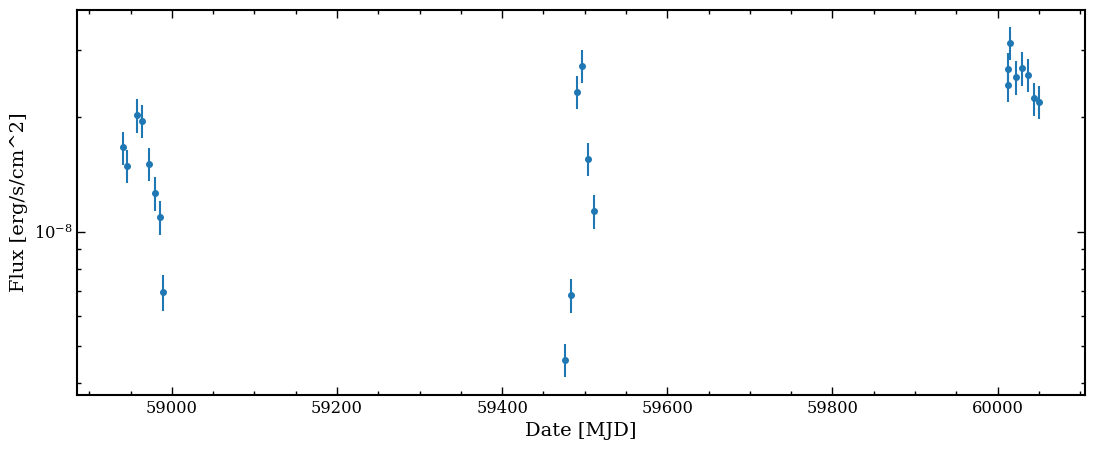

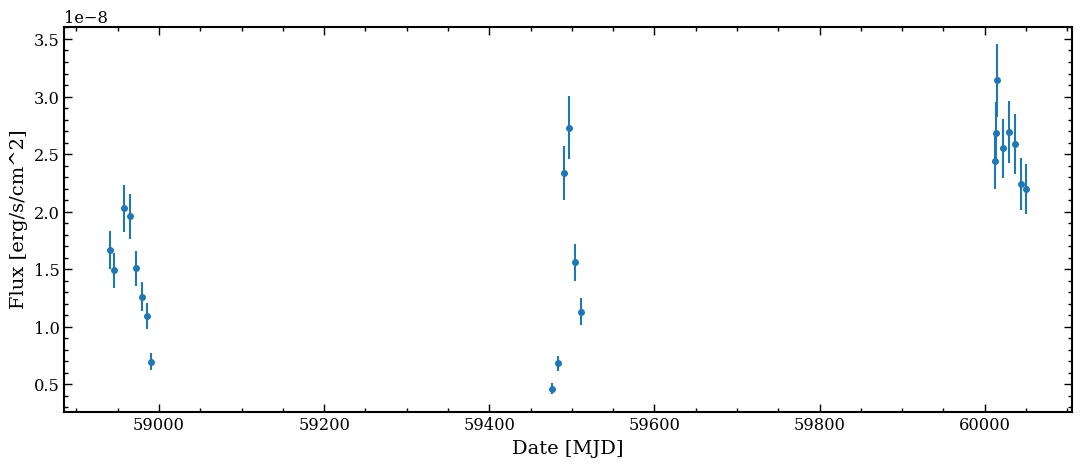

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

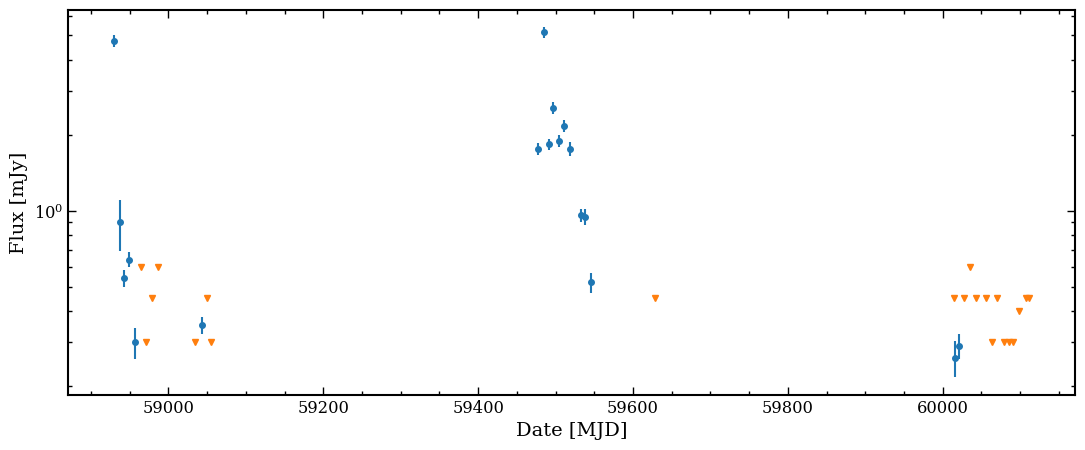

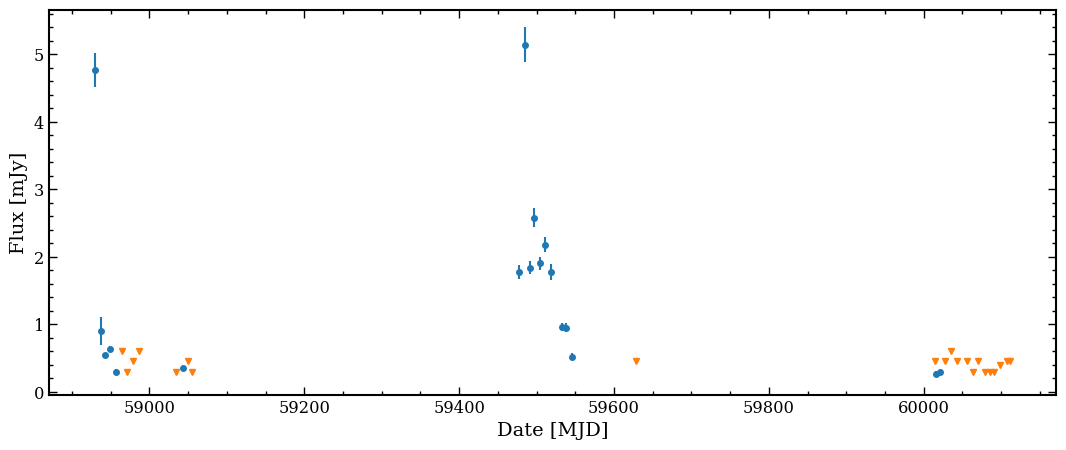

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58957.114000000     0.30000             0.04272             1         2.02800e-08                   2.03877e-09                   2.03935e-09                   False          False          SS             
58964.171000000     0.60000             0.20000             1         1.95800e-08                   1.96739e-09                   1.96787e-09                   True           False          SS             
58970.991000000     0.30000             0.10000             1         1.50800e-08                   1.51946e-09                   1.52010e-09                   True           False          SS             
58978.144000000     0.45000             0.15000             1         1.26200e-08                   1.27470e-09                   1.27559e-09                   True           F

In [9]:
paired_data[["t", "Fx", "Lx", "Fr", "Lr"]]

,t,Fx,Lx,Fr,Lr
0,58957.114,2.028000e-08,3.209707e+38,0.30,6.077551e+28
1,58964.171,1.958000e-08,3.098918e+38,0.60,1.215510e+29
2,58970.991,1.508000e-08,2.386705e+38,0.30,6.077551e+28
3,58978.144,1.262000e-08,1.997362e+38,0.45,9.116327e+28
4,58986.144,1.091000e-08,1.726721e+38,0.60,1.215510e+29
5,59496.616,2.730000e-08,4.320759e+38,2.58,5.226694e+29
6,59504.480,1.558000e-08,2.465840e+38,1.90,3.849116e+29
7,59510.490,1.132000e-08,1.791611e+38,2.18,4.416354e+29
8,60014.022,2.684000e-08,4.247955e+38,0.45,9.116327e+28
9,60015.229,3.141000e-08,4.971247e+38,0.26,5.267211e+28


In [10]:
# CHECK
L, L_unc_l, L_unc_u = convert_Fx(Fx_erg_s_cm2=2.028000e-08, Fx_erg_s_cm2_unc_l=0, Fx_erg_s_cm2_unc_u=0, d_kpc=11.5, d_kpc_unc=0)
print(L)

# From Zuobin paper, observation around 58957
F = 1.794733627e-8
L, L_unc_l, L_unc_u = convert_Fx(Fx_erg_s_cm2=F, Fx_erg_s_cm2_unc_l=0, Fx_erg_s_cm2_unc_u=0, d_kpc=11.5, d_kpc_unc=0)
print(L)

3.209706626470552e+38
2.8405169700845306e+38


In [11]:
lr_all, lx_all, all_types = get_bahramian_data()

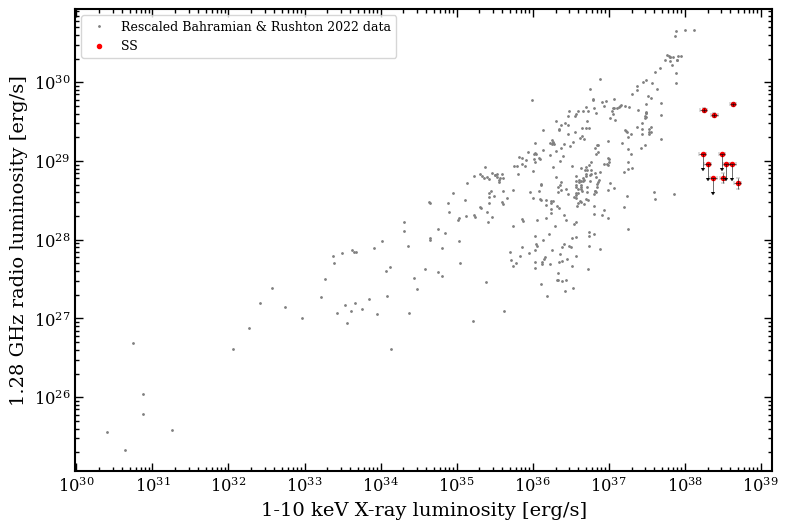

In [12]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolated

dt1, dt2:  3.0 10.0

Number of plotting points:  1109
Rejected based on distance: radio_MJD = 58929.085; time_to_nearest: 11.744780000000901; time_to_furthest: 58929.085
Rejected based on distance: radio_MJD = 58937.333; time_to_nearest: 3.4967800000013085; time_to_furthest: 58937.333
58942.151: time_to_nearest: 1.321219999997993 & time_to_furthest: 3.4992400000046473; y_predict_err: 0.034446928483682804
Rejected based on distance: radio_MJD = 58949.265; time_to_nearest: 3.6147599999967497; time_to_furthest: 8.543409999998403
58957.114: time_to_nearest: 0.6944099999964237 & time_to_furthest: 11.463759999998729; y_predict_err: 0.04788956155741886
58964.171: time_to_nearest: 0.19453000000066822 & time_to_furthest: 6.362590000004275; y_predict_err: 0.04682065470132102
58970.991: time_to_nearest: 0.8723299999983283 & time_to_furthest: 6.625469999999041; y_predict_err: 0.04555590471241544
58978.144: time_to_nearest: 0.8340400000015507 & time_to_furthest: 6.2806700000001; y_predict_err: 0.04

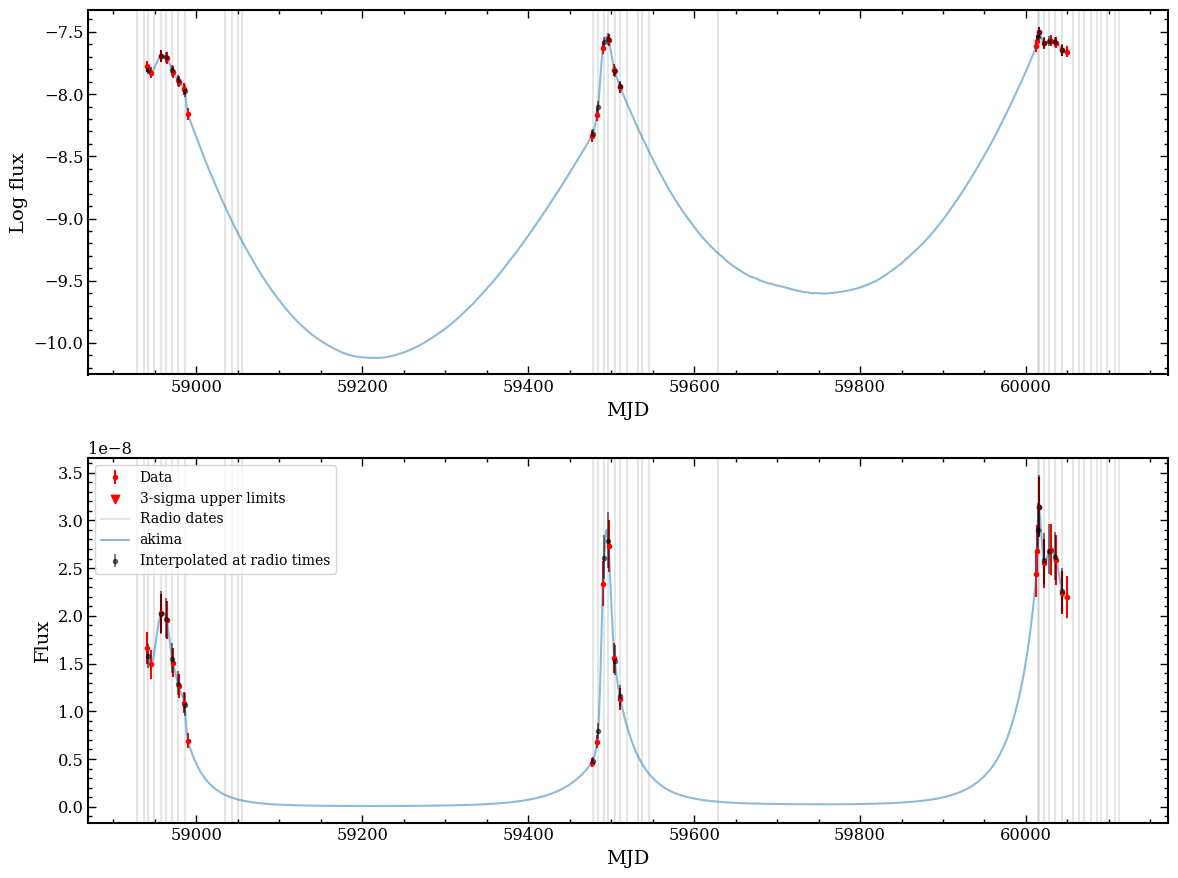

Number of used interpolated data points:  18
Converting to luminosity using d_kpc = 11.5


In [13]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

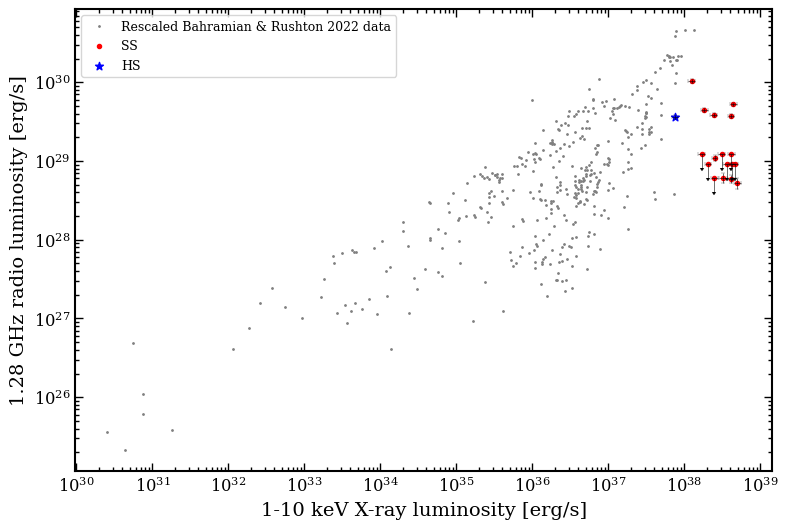

In [15]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)

---

# NICER Data

In [56]:
## Get the NICER data 
# This is the same data as in Zuobin's 2026 paper

IDs = []
start_mjd = []
flux = []
flux_unc_l = []
flux_unc_u = []

with open("../DATA/NICER/4U 1630-47_NICER_data.txt", "r") as file:
    for line in file:
        # Skip comment or empty lines
        if line.startswith("#") or not line.strip():
            continue
        
        parts = line.split()
        # Ensure there are enough columns
        if len(parts) >= 14:
            try:

                id = parts[0]
                IDs.append(id)

                mjd = float(parts[1])
                start_mjd.append(mjd)
                
                # Diskbb component
                # Uncertainties are 90%
                if parts[6] =="-P":
                    fdbb, fdbb_unc_l, fdbb_unc_u  = 0, 0, 0
                else:
                    fdbb = 10**float(parts[5])
                    fdbb_unc_l = fdbb * ( 1 - 10** - (float(parts[6]))) 
                    fdbb_unc_u = fdbb * ( 10** float(parts[7]) - 1 ) 

                # nthcomp component
                # Uncertainties are 90%
                if parts[12] =="-P":
                    fnth, fnth_unc_l, fnth_unc_u  = 0, 0, 0
                else:
                    fnth = 10**float(parts[11]) 
                    fnth_unc_l = fnth * ( 1 - 10** (-float(parts[12])) ) 
                    fnth_unc_u = fnth * ( 10** float(parts[13]) - 1 ) 
                
                
                flux.append(fdbb + fnth)
                flux_unc_l.append(np.sqrt ( (fdbb_unc_l)**2 + (fnth_unc_l)**2 ) ) # assumes errors are uncorrelated
                flux_unc_u.append(np.sqrt ( (fdbb_unc_u)**2 + (fnth_unc_u)**2 ) ) # assumes errors are uncorrelated

                
            except ValueError:
                # Skip lines with invalid float conversion
                continue

# Convert to NumPy arrays if needed
nicer_start_mjd = np.array(start_mjd)
nicer_flux = np.array(flux)
nicer_flux_unc_l = np.array(flux_unc_l)
nicer_flux_unc_u = np.array(flux_unc_u)
nicer_uplims = np.array([False]*len(nicer_flux))  # Assuming no upper limits in this data

print(len(nicer_start_mjd), len(nicer_flux), len(nicer_flux_unc_l), len(nicer_flux_unc_u), len(nicer_uplims))

# Put this into a dataframe with t_xray, Fx, Fx_unc_l, Fx_unc_u, Fx_uplim_bool
xray_nicer_df = pd.DataFrame({
    "obsID": IDs,
    "t_xray": nicer_start_mjd,
    "Fx": nicer_flux,
    "Fx_unc_l": nicer_flux_unc_l,
    "Fx_unc_u": nicer_flux_unc_u,
    "Fx_uplim_bool": nicer_uplims
})

# Add the state info
xray_nicer_df["Xstate"] = np.where(
    (xray_nicer_df["t_xray"] >= 59470) & (xray_nicer_df["t_xray"] <= 59484),
    "HS",
    "SS"
)

85 85 85 85 85


In [57]:
xray_nicer_df

,obsID,t_xray,Fx,Fx_unc_l,Fx_unc_u,Fx_uplim_bool,Xstate
0,3130010101,58927.659967,1.135759e-08,2.361264e-10,2.516163e-10,False,SS
1,3130010102,58934.677629,1.606607e-08,3.109064e-10,3.122140e-10,False,SS
2,3130010103,58935.905176,1.796294e-08,3.046290e-10,3.119662e-10,False,SS
3,3130010104,58936.421692,1.758944e-08,2.990956e-10,2.960945e-10,False,SS
4,3130010105,58938.225176,1.755862e-08,5.275405e-10,5.198812e-10,False,SS
5,3130010106,58940.875940,1.761679e-08,2.869444e-10,2.821398e-10,False,SS
6,3130010107,58941.680245,1.664468e-08,2.513932e-10,2.332557e-10,False,SS
7,3130010108,58942.619215,1.455459e-08,1.334373e-10,1.346720e-10,False,SS
8,3130010109,58943.329487,1.438136e-08,1.318491e-10,7.303631e-11,False,SS
9,3130010110,58945.022653,1.510080e-08,1.384450e-10,1.397260e-10,False,SS


In [ ]:
# CHECK
# 46	4130010105	59474.483249	2.396528e-09	5.344533e-10	4.813901e-10	False	HS

# Diskbb
flux_1 = 10**(-9.35)
print(flux_1)
flux_unc_l_1 = flux_1 -  10**(-9.35-0.9) 
print(flux_unc_l_1)

print()

# nthcomp
flux_2 = 10**(-8.71)
print( flux_2)
flux_unc_l_2 = flux_2 -  10**(-8.71-0.09)
print(flux_unc_l_2)

print()

print(flux_1 + flux_2)
print(np.sqrt( flux_unc_l_1**2 + flux_unc_l_2**2 ))

['4130010105']
4.4668359215096347e-10
3.9044945963192857e-10

1.9498445997580416e-09
3.6495140729693065e-10

2.396528191909005e-09
5.34453281601746e-10


In [58]:
paired_data_nicer = make_paired_Lr_Lx_df(radio_df, xray_nicer_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58937.333000000     0.90000             0.20500             2         1.75819e-08                   2.60187e-10                   2.57291e-10                   False          False          SS             
58942.151000000     0.54000             0.04036             2         1.50443e-08                   1.17863e-10                   1.16629e-10                   False          False          SS             
58949.265000000     0.64000             0.04386             1         1.50661e-08                   9.33749e-11                   8.69774e-11                   False          False          SS             
58957.114000000     0.30000             0.04272             1         1.79473e-08                   3.27576e-10                   1.24405e-10                   False          F

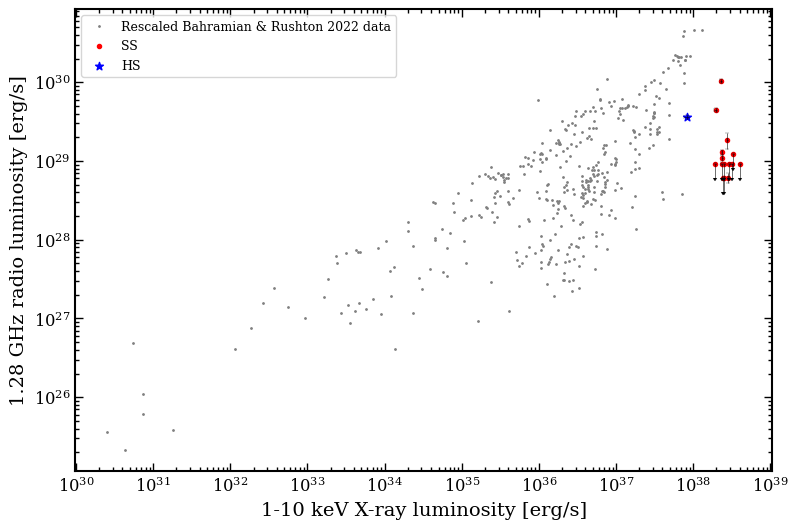

In [59]:
plot_Lr_Lx(paired_data_nicer, colourby="state", lx=lx_all, lr=lr_all)

dt1, dt2:  3.0 10.0

Number of plotting points:  1185
58929.085: time_to_nearest: 1.4250325925895595 & time_to_furthest: 5.592629444443446; y_predict_err: 0.009681205946113103
58937.333: time_to_nearest: 0.8921757407370023 & time_to_furthest: 0.9113080555544002; y_predict_err: 0.008333988752090349
58942.151: time_to_nearest: 0.4682150925946189 & time_to_furthest: 0.47075481481442694; y_predict_err: 0.004614506505371985
58949.265: time_to_nearest: 0.4965024999983143 & time_to_furthest: 1.2934685648142477; y_predict_err: 0.0025341845568780386
58957.114: time_to_nearest: 0.6909037500008708 & time_to_furthest: 1.004379814818094; y_predict_err: 0.005781691373728748
58964.171: time_to_nearest: 0.9262987963011255 & time_to_furthest: 1.203735925926594; y_predict_err: 0.008242905814679347
58970.991: time_to_nearest: 0.38839449073566357 & time_to_furthest: 0.8388045833344222; y_predict_err: 0.005524402985930266
58978.144: time_to_nearest: 0.17546393518568948 & time_to_furthest: 0.696544166668900

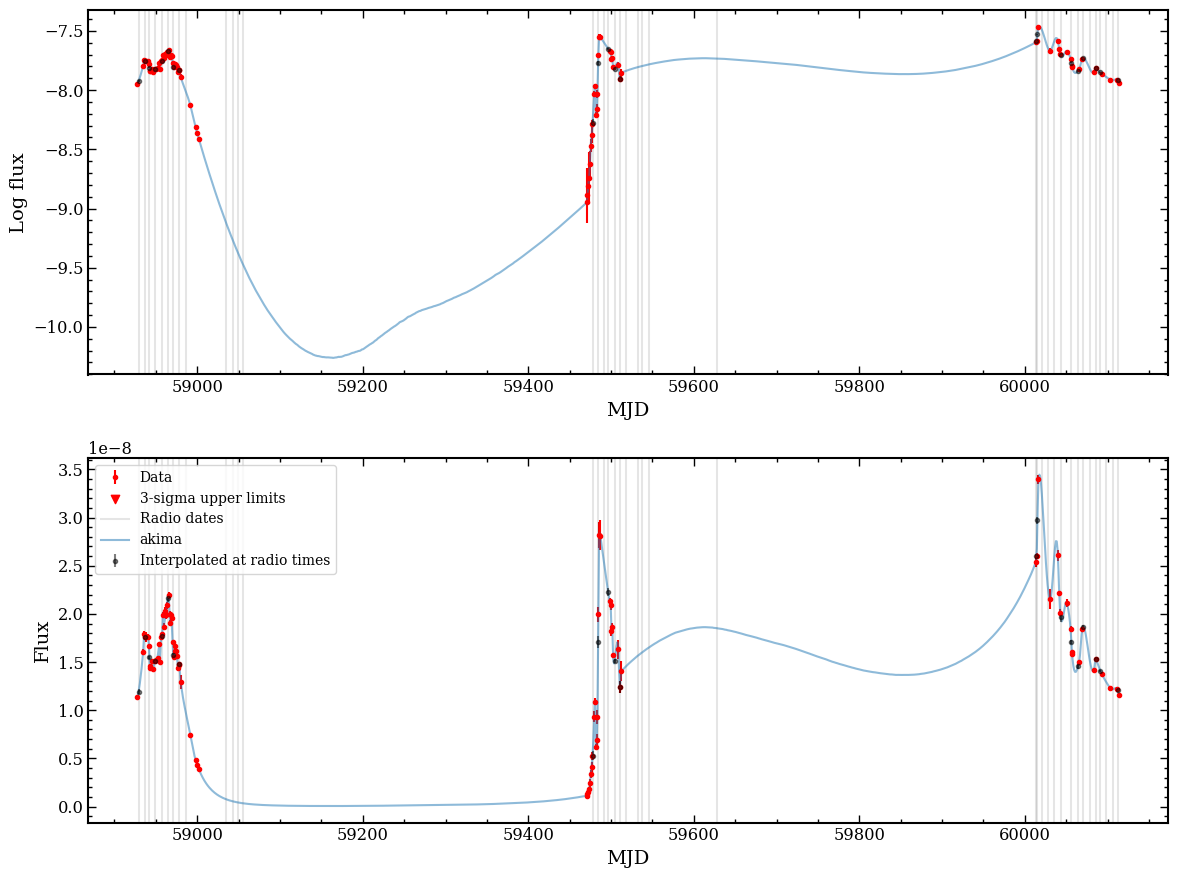

Number of used interpolated data points:  22
Converting to luminosity using d_kpc = 11.5


In [61]:
interpolated_data_nicer = make_interpolated_Lr_Lx_df(radio_df, xray_nicer_df, source_df, plotly=True)

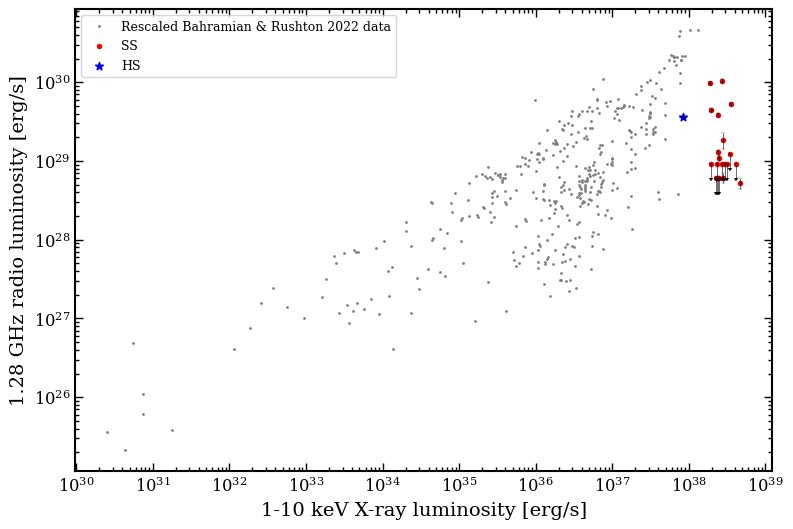

In [62]:
plot_Lr_Lx(interpolated_data_nicer, colourby="state", lx=lx_all, lr=lr_all)

---

# NICER and Swift/XRT Comparison

In [63]:
## Swift/XRT data
xray_dates = xray_df ["t_xray"].to_numpy()
xray_flux = xray_df ["Fx"].to_numpy()
xray_flux_unc_l = xray_df ["Fx_unc_l"].to_numpy()
xray_flux_unc_u = xray_df ["Fx_unc_u"].to_numpy()
xray_uplims = xray_df ["Fx_uplim_bool"].to_numpy()

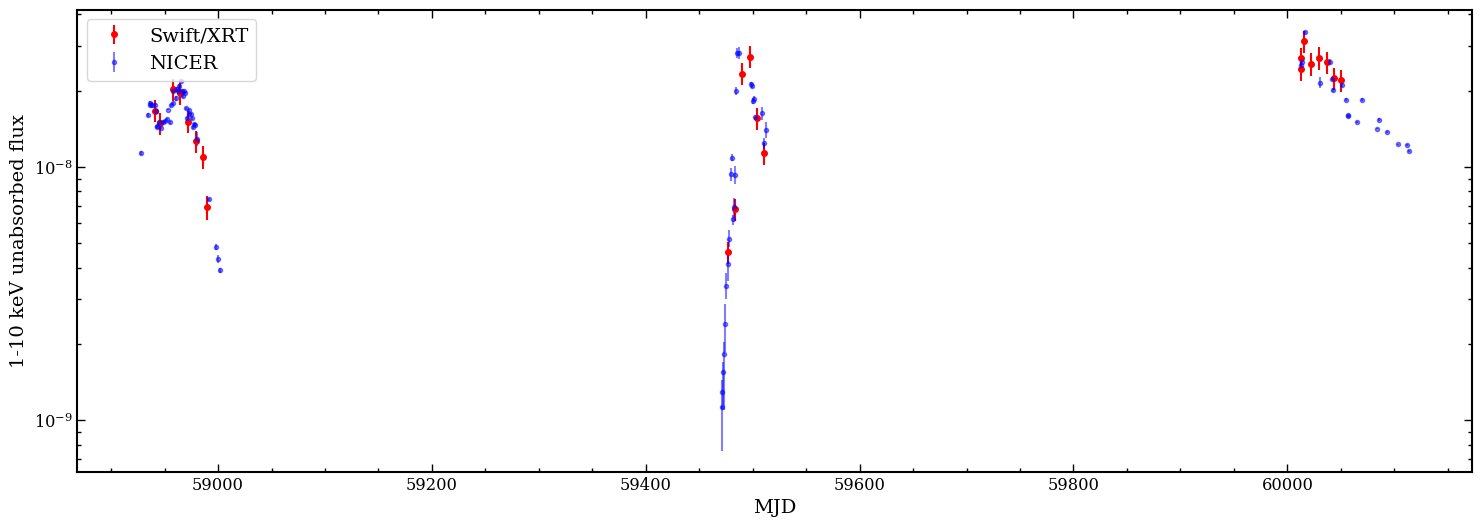

In [68]:
plt.figure(figsize=(18,6))
plt.errorbar(xray_dates , xray_flux , yerr=[xray_flux_unc_l, xray_flux_unc_u], fmt=".", color="red", label="Swift/XRT", ms=8)
plt.errorbar(nicer_start_mjd, nicer_flux , yerr=[nicer_flux_unc_l, nicer_flux_unc_u], fmt=".", color="blue", label="NICER", alpha=0.5)
plt.ylabel("1-10 keV unabsorbed flux")
plt.xlabel("MJD")
plt.legend()
plt.yscale('log')
plt.show()

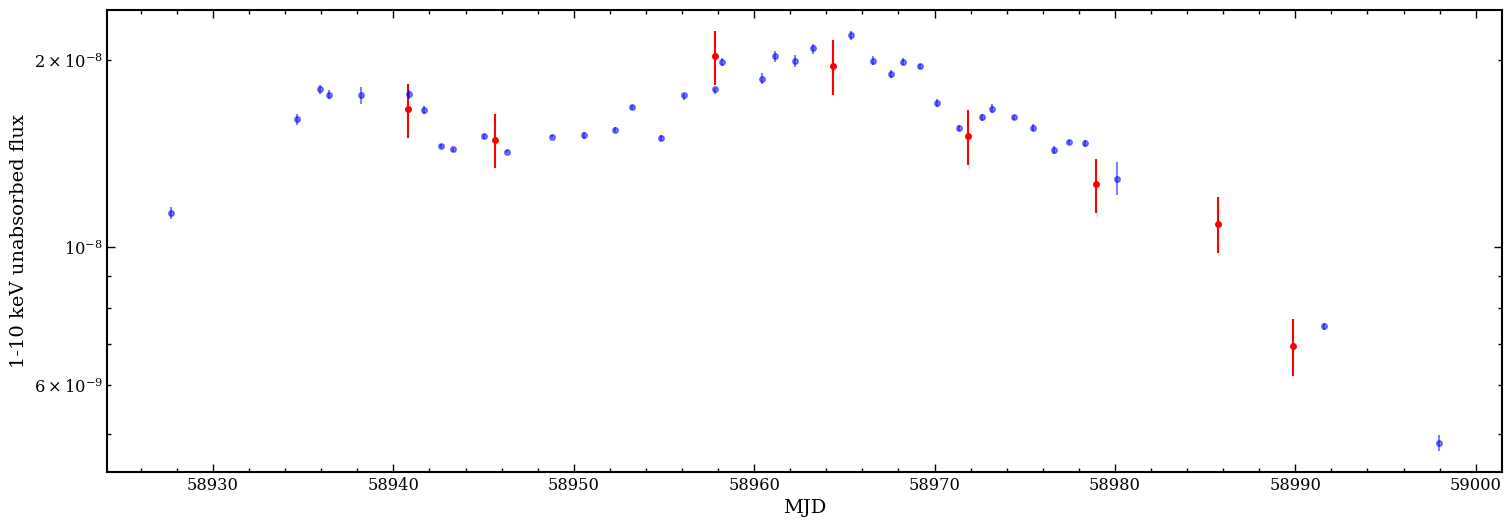

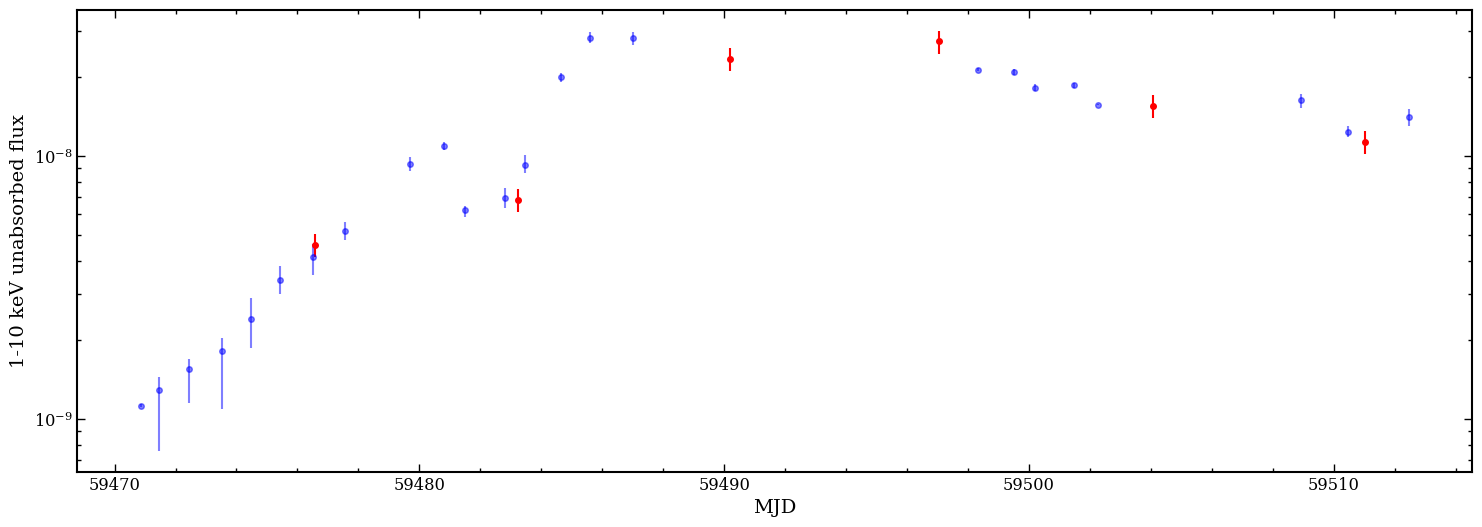

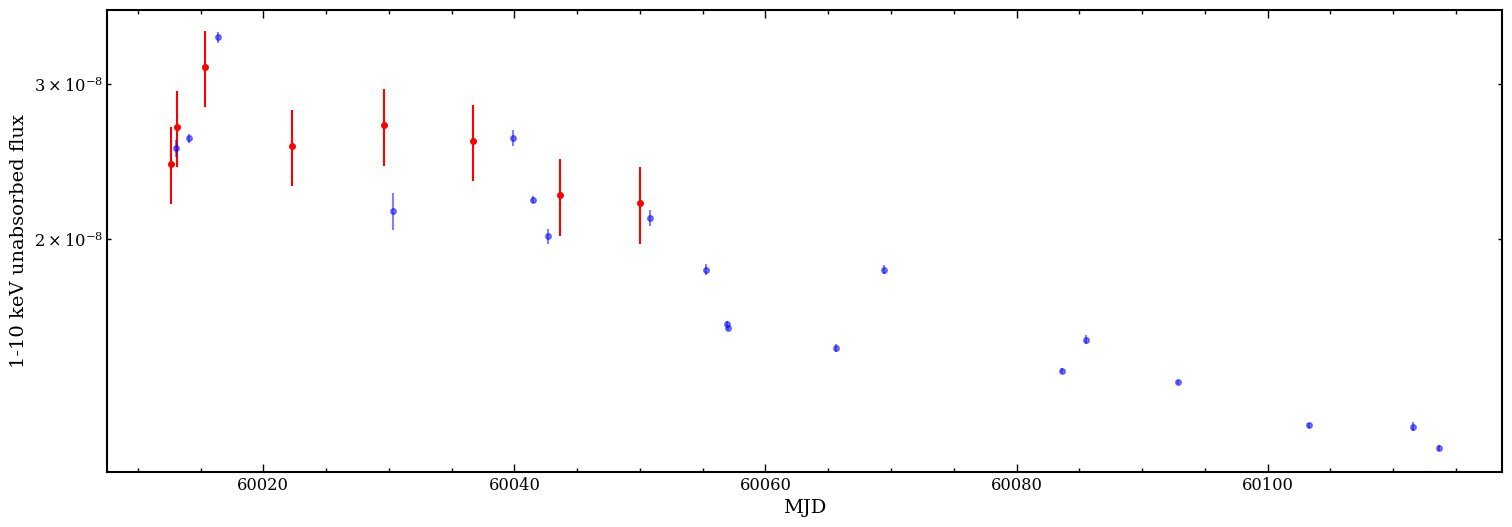

In [70]:
## Zoom in to different regions


for date_range in ([[0,59000], [59400, 59600], [59800,70000]]):
    mask1 = (xray_dates>=date_range[0]) & (xray_dates<date_range[1])
    mask2 = (nicer_start_mjd>=date_range[0]) & (nicer_start_mjd<date_range[1])

    plt.figure(figsize=(18,6))
    plt.errorbar(xray_dates[mask1], xray_flux[mask1] , yerr=[xray_flux_unc_l[mask1], xray_flux_unc_u[mask1]], fmt=".", color="red", label="Swift/XRT", ms=8)
    plt.errorbar(nicer_start_mjd[mask2], nicer_flux[mask2] , yerr=[nicer_flux_unc_l[mask2], nicer_flux_unc_u[mask2]], fmt=".", color="blue", label="NICER", alpha=0.5, ms=8)
    plt.ylabel("1-10 keV unabsorbed flux")
    plt.xlabel("MJD")
    plt.yscale('log')
    plt.show()